In [13]:
# 导入所需库
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# 加载数据集的函数
def load_images_from_folder(folder, size=(256, 256)):
    images = []
    for filename in os.listdir(folder):
        img = load_img(os.path.join(folder, filename), target_size=size)
        if img is not None:
            images.append(img_to_array(img))
    return np.array(images)

def create_autoencoder(input_shape=(256, 256, 3)):
    input_img = tf.keras.Input(shape=input_shape)
    # 编码器部分
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    # 添加Dropout层进行正则化
    x = layers.Dropout(0.5)(x)
    # 编码器的更多层可以在这里加入...
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    # 解码器部分
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    # 添加Dropout层进行正则化
    x = layers.Dropout(0.5)(x)
    # 解码器的更多层可以在这里加入...
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder
# 加载数据
train_data_path = 'healthy'  # 训练数据文件夹路径
test_data_path = 'sickness'   # 测试数据文件夹路径

x_train = load_images_from_folder(train_data_path) / 255.0
x_test = load_images_from_folder(test_data_path) / 255.0

# 创建自编码器模型
autoencoder = create_autoencoder()

# 训练模型
history = autoencoder.fit(
    x_train, x_train, 
    epochs=100,  # 可能需要更多的训练周期
    batch_size=32, 
    shuffle=True,
    validation_data=(x_test, x_test)  # 使用独立的测试集作为验证数据
)



Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - loss: 0.0882 - val_loss: 0.0082
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 0.0199 - val_loss: 0.0102
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 0.0233 - val_loss: 0.0090
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.0222 - val_loss: 0.0056
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.0172 - val_loss: 0.0280
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.0100 - val_loss: 0.0278
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.0081 - val_loss: 0.0289
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.0072 - val_loss: 0.0292
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 0.0063 - val_loss: 0.0305
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.0058 - val_loss: 0.0268
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.0053 - val_loss: 0.0268
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.0049 - val_loss: 0.0297
Epoch 13/100


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


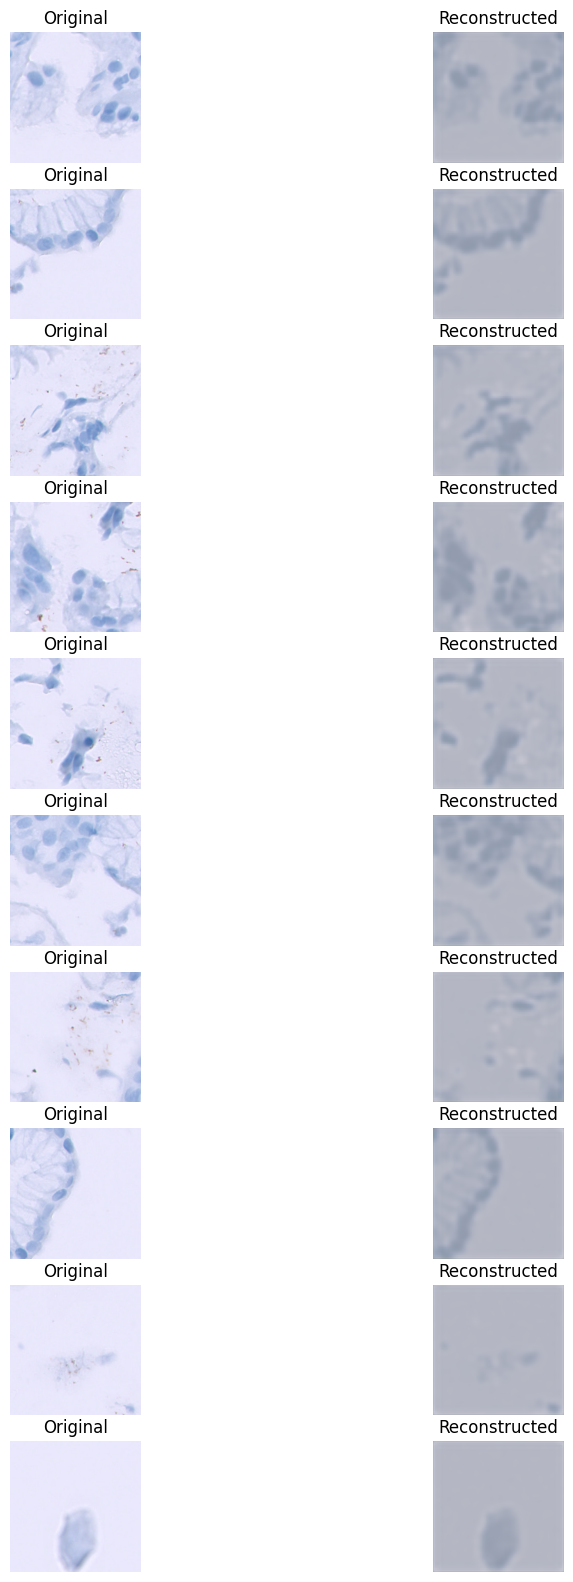

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


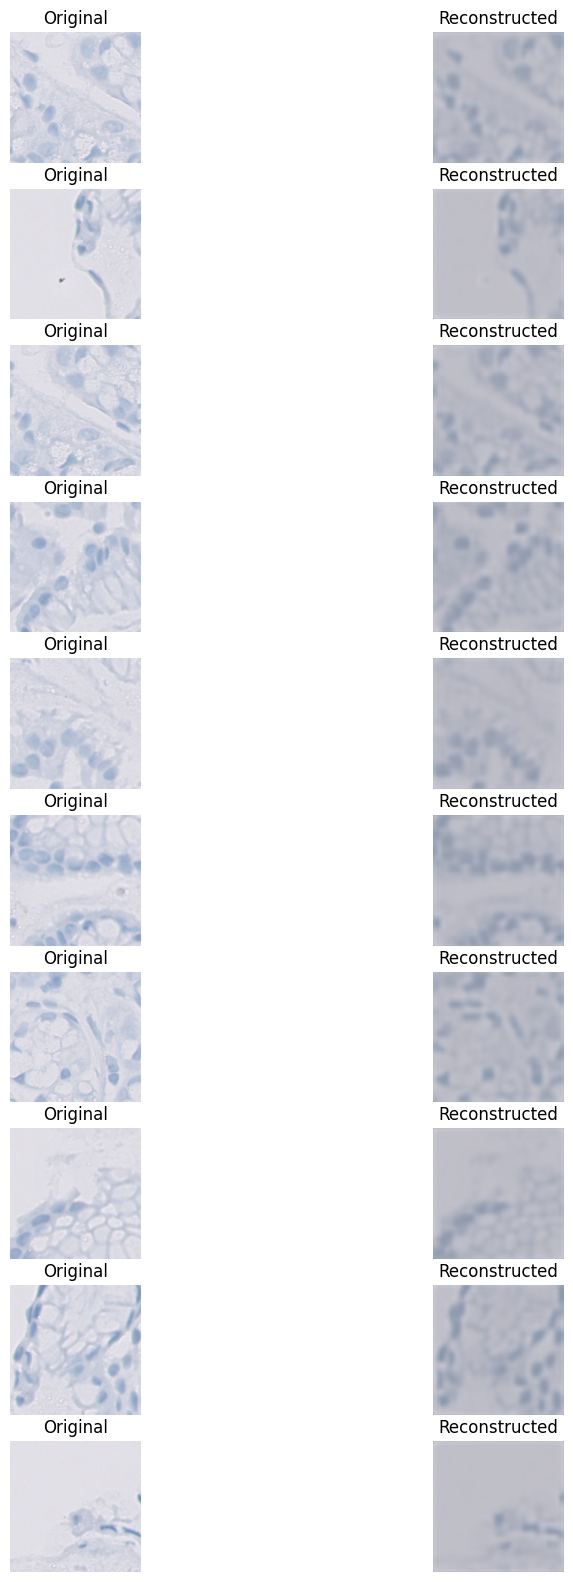

In [14]:
# 评估和展示函数
def display_reconstructed_images(model, x_data, n=10):
    indices = np.random.choice(range(len(x_data)), n, replace=False)
    fig, axs = plt.subplots(n, 2, figsize=(10, 2*n))
    for i, idx in enumerate(indices):
        original_img = x_data[idx]
        reconstructed_img = model.predict(np.expand_dims(original_img, axis=0))[0]
        
        # 使用clip函数确保图像像素值在0到1之间
        reconstructed_img = np.clip(reconstructed_img, 0, 1)
        
        axs[i, 0].imshow(original_img)
        axs[i, 0].title.set_text('Original')
        axs[i, 0].axis('off')
        axs[i, 1].imshow(reconstructed_img)
        axs[i, 1].title.set_text('Reconstructed')
        axs[i, 1].axis('off')
    plt.show()


display_reconstructed_images(autoencoder, x_test)
display_reconstructed_images(autoencoder, x_train)



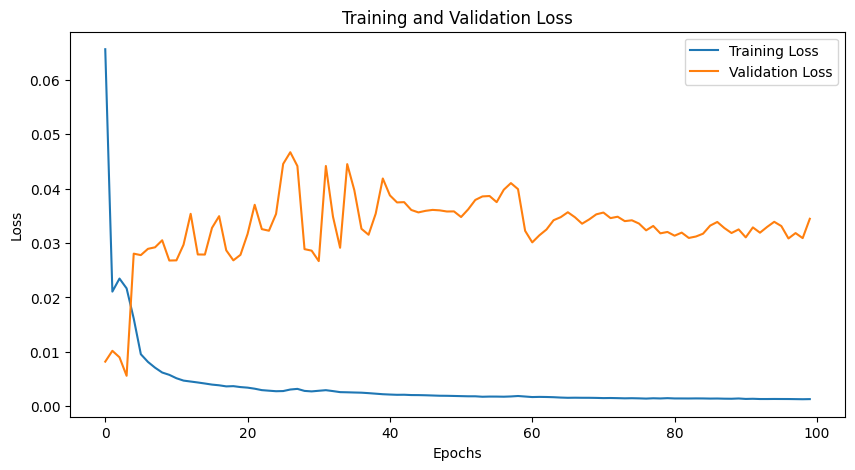

In [15]:


# 绘制训练和验证损失
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/Users/jiaojiaosun/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiaojiaosun/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiaojiaosun/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiaojiaosun/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiaojiaosun/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

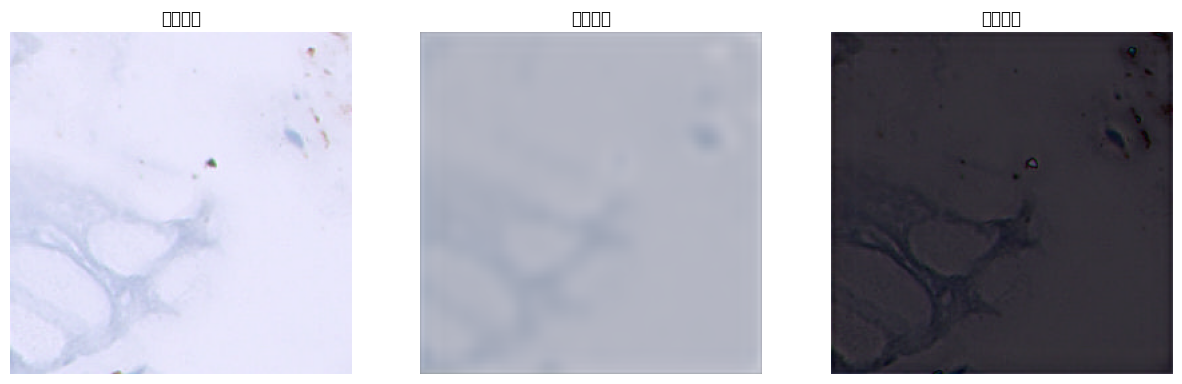

In [16]:
def plot_reconstruction_error(model, x_data, image_index):
    # 假设 x_data 已经缩放到 [0, 1]
    original_img = x_data[image_index]
    reconstructed_img = model.predict(np.expand_dims(original_img, axis=0))[0]
    
    # 计算重建误差
    reconstruction_error = np.abs(original_img - reconstructed_img)
    
    # 绘制原始图像、重建图像和误差图像
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title('原始图像')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(reconstructed_img)
    plt.title('重建图像')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(reconstruction_error, cmap='hot')
    plt.title('重建误差')
    plt.axis('off')
    
    plt.show()

# 选择一个图像索引并调用该函数
image_index = 0
plot_reconstruction_error(autoencoder, x_test, image_index)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


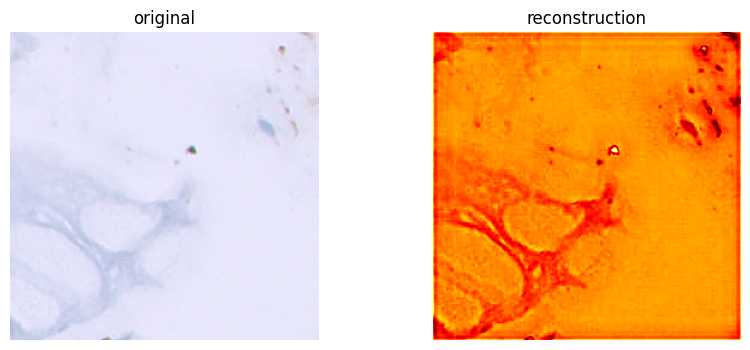

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 从测试数据中选择一个样本
test_sample = x_test[0:1]  # 选择第一个测试样本，假设其尺寸为(1, 256, 256, 3)

# 使用自编码器进行重建
reconstructed_sample = autoencoder.predict(test_sample)

# 将测试样本和重建样本从(1, 256, 256, 3)变换为(256, 256, 3)并缩放到[0, 1]范围
test_sample = test_sample.reshape((256, 256, 3))
reconstructed_sample = reconstructed_sample.reshape((256, 256, 3))

# 计算重建误差，这里我们使用欧几里得距离来表示每个像素点的误差
reconstruction_error = np.sqrt(np.sum((test_sample - reconstructed_sample) ** 2, axis=-1))

# 绘制重建误差
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(test_sample)
plt.title('original')
plt.axis('off')

plt.subplot(1, 2, 2)
# plt.imshow(reconstruction_error, cmap='jet')
plt.imshow(reconstruction_error, cmap='hot')
plt.title('reconstruction')
plt.axis('off')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


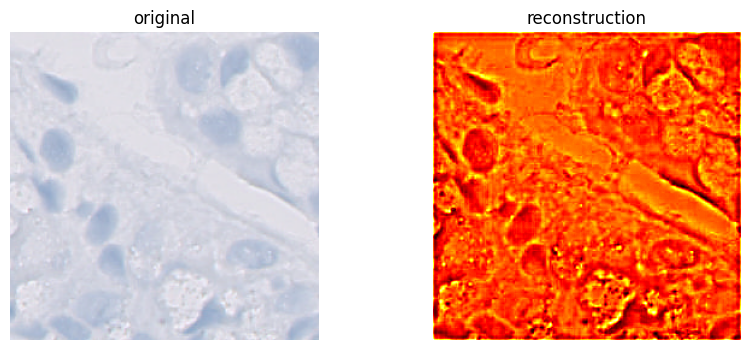

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 从测试数据中选择一个样本
test_sample = x_train[0:1]  # 选择第一个测试样本，假设其尺寸为(1, 256, 256, 3)

# 使用自编码器进行重建
reconstructed_sample = autoencoder.predict(test_sample)

# 将测试样本和重建样本从(1, 256, 256, 3)变换为(256, 256, 3)并缩放到[0, 1]范围
test_sample = test_sample.reshape((256, 256, 3))
reconstructed_sample = reconstructed_sample.reshape((256, 256, 3))

# 计算重建误差，这里我们使用欧几里得距离来表示每个像素点的误差
reconstruction_error = np.sqrt(np.sum((test_sample - reconstructed_sample) ** 2, axis=-1))

# 绘制重建误差
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(test_sample)
plt.title('original')
plt.axis('off')

plt.subplot(1, 2, 2)
# plt.imshow(reconstruction_error, cmap='jet')
plt.imshow(reconstruction_error, cmap='hot')
plt.title('reconstruction')
plt.axis('off')

plt.show()


In [22]:
# 假设模型已经被训练，并且x_train已经包含了训练数据
# 使用模型对训练数据进行重建
reconstructions = autoencoder.predict(x_train)

# 计算重建图像和原始图像之间的平均绝对误差(MAE)
train_loss = tf.keras.losses.mae(reconstructions, x_train)

# 计算误差的阈值，通常设置为训练损失的均值加上一个标准差
threshold = np.mean(train_loss) + np.std(train_loss)

# 输出阈值
print("Threshold: ", threshold)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step
Threshold:  0.14076068


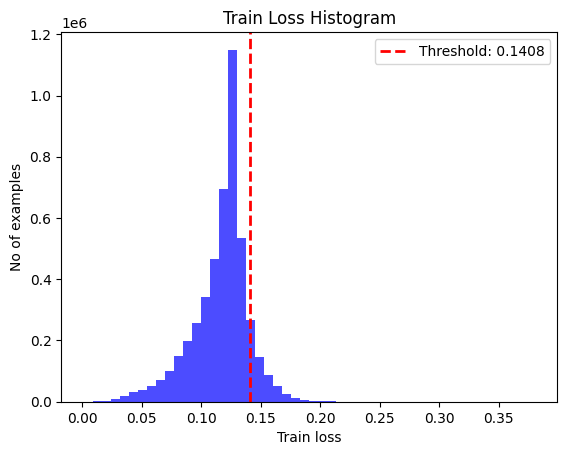

Threshold:  0.14076068


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 这里假设 train_loss 已经是你的模型计算出的一维重建误差数组
# 如果 train_loss 是多维的，请确保先将其展平成一维数组
# train_loss = np.random.normal(loc=0.02, scale=0.01, size=(1000, 256, 256, 3))  # 这里只是举个例子
train_loss = train_loss.numpy().flatten()

# 计算误差的阈值
# threshold = np.mean(train_loss) + np.std(train_loss)

# 绘制训练损失的直方图
plt.hist(train_loss, bins=50, color='blue', alpha=0.7)
plt.axvline(x=threshold, color='red', linestyle='dashed', linewidth=2, label=f'Threshold: {threshold:.4f}')
plt.title('Train Loss Histogram')
plt.xlabel('Train loss')
plt.ylabel('No of examples')
plt.legend()
plt.show()

# 输出阈值
print("Threshold: ", threshold)



In [76]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  test_loss = np.mean(loss)
  print(test_loss)
  print(threshold)
  # True => 异常
  print(tf.math.less(threshold, test_loss).numpy())
  return [tf.math.less(threshold, test_loss).numpy()]

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))


preds = predict(autoencoder, x_test, threshold)
test_labels = np.array([True] * 1)
print_stats(preds, test_labels)

0.18129869
0.14076068
True
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
